Функція парсингу реальних даних

In [1]:
import numpy as np
import pandas as pd
import math as mth
import matplotlib.pyplot as plt

def parse_data(url, file_path, column_name):
    df = pd.read_excel(file_path)
    for _, col_values in df[[column_name]].items():
        print(col_values)
    data_array = np.zeros((len(col_values)))
    for idx in range(len(col_values)):
        data_array[idx] = col_values[idx]
    return data_array


In [2]:
def generate_random_normal(mean_val, std_dev, num_samples):
    sample_data = np.random.normal(mean_val, std_dev, num_samples)
    mean_sample = np.mean(sample_data)
    var_sample = np.var(sample_data)
    stddev_sample = mth.sqrt(var_sample)

    print('Characteristics of Normal Distribution')
    print('Mean:', mean_sample)
    print('Variance:', var_sample)
    print('Standard Deviation:', stddev_sample)
    print('-------------------------')

    plt.hist(sample_data, bins=20, color="purple", alpha=0.6)
    plt.show()
    return sample_data

In [15]:
def generate_random_uniform(size, low=0, high=1):
    uniform_samples = np.random.uniform(low, high, size)
    mean_uniform = np.mean(uniform_samples)
    var_uniform = np.var(uniform_samples)
    stddev_uniform = mth.sqrt(var_uniform)

    print('Characteristics of Uniform Distribution')
    print('Mean:', mean_uniform)
    print('Variance:', var_uniform)
    print('Standard Deviation:', stddev_uniform)
    print('--------------------')

    plt.hist(uniform_samples, bins=20, color="purple", alpha=0.6)
    plt.show()
    return uniform_samples

In [7]:
def linear_model(num_points):
    linear_data = np.zeros((num_points))
    for idx in range(num_points):
        linear_data[idx] = 0.0000005 * idx * idx
    return linear_data

def noisy_model(base_model, noise_data, num_points):
    result_model = np.zeros(num_points)
    for idx in range(num_points):
        result_model[idx] = base_model[idx] + noise_data[idx]
    return result_model

def trend_with_anomalies(base_model, noisy_data, anomaly_count, anomaly_factor):
    anomaly_samples = np.zeros((anomaly_count))
    anomaly_indices = np.random.randint(0, len(base_model), anomaly_count)

    for i in range(anomaly_count):
        anomaly_samples[i] = mth.ceil(np.random.randint(1, anomaly_factor))
        noisy_data[anomaly_indices[i]] = base_model[anomaly_indices[i]] + anomaly_factor * anomaly_samples[i]
    return noisy_data

def quadratic_model(num_points):
    quadratic_data = np.zeros(num_points)
    for idx in range(num_points):
        quadratic_data[idx] = 0.0000005 * idx * idx
    return quadratic_data

def add_normal_noise(noise_data, model_data, num_points):
    final_data = np.zeros(num_points)
    for idx in range(num_points):
        final_data[idx] = model_data[idx] + noise_data[idx]
    return final_data

def add_anomalies_normal(noise_data, model_data, anomaly_count, anomaly_factor):
    anomaly_samples = np.random.normal(0, anomaly_factor * 5, anomaly_count)
    anomaly_indices = np.random.randint(0, len(model_data), anomaly_count)

    for idx in range(anomaly_count):
        model_data[anomaly_indices[idx]] = model_data[anomaly_indices[idx]] + anomaly_samples[idx]
    return model_data

In [8]:
def calculate_statistics(data, label):
    def fit_trend(data_array):
        length = len(data_array)
        fitted_values = apply_mls(data_array)
        detrended_data = np.zeros(length)
        for i in range(length):
            detrended_data[i] = data_array[i] - fitted_values[i, 0]
        return detrended_data

    def fit_constant_trend(data_array):
        length = len(data_array)
        model_vals = quadratic_model(length)
        detrended_data = np.zeros(length)
        for i in range(length):
            detrended_data[i] = data_array[i] - model_vals[i]
        return detrended_data

    detrended = fit_trend(data)

    mean_value = np.median(detrended)
    variance_value = np.var(detrended)
    stddev_value = mth.sqrt(variance_value)

    print('Sample Statistics')
    print('Median:', mean_value)
    print('Variance:', variance_value)
    print('Standard Deviation:', stddev_value)
    return


def apply_mls(data_array):
    length = len(data_array)
    y_values = np.zeros((length, 1))
    design_matrix = np.ones((length, 3))

    for idx in range(length):
        y_values[idx, 0] = float(data_array[idx])
        design_matrix[idx, 1] = float(idx)
        design_matrix[idx, 2] = float(idx ** 2)

    transposed_matrix = design_matrix.T
    matrix_product = transposed_matrix.dot(design_matrix)
    inverse_matrix = np.linalg.inv(matrix_product)
    coefficients = inverse_matrix.dot(transposed_matrix).dot(y_values)
    return design_matrix.dot(coefficients)


def plot_data(trend_data, noisy_data, label_text):
    plt.clf()
    plt.plot(noisy_data, label="Observed Data", color="blue", marker='o')
    plt.plot(trend_data, label="Trend", color="green", linestyle='--', marker='x')
    plt.ylabel(label_text)
    plt.xlabel("Index")
    plt.legend()
    plt.grid(True)
    plt.show()
    return


Characteristics of Normal Distribution
Mean: 0.0419265118465855
Variance: 25.135828005951762
Standard Deviation: 5.013564401296922
-------------------------


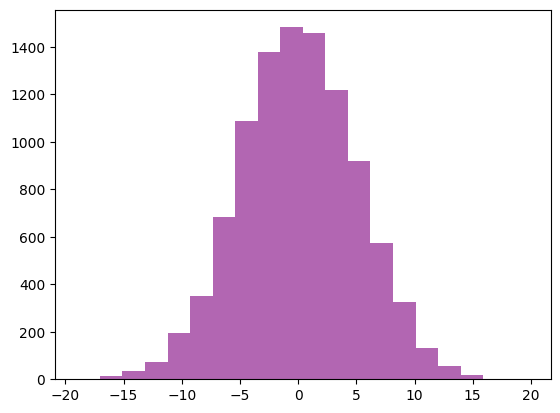

Characteristics of Uniform Distribution
Mean: 4928.875613753784
Variance: 8245611.13156134
Standard Deviation: 2871.5172177024015
--------------------


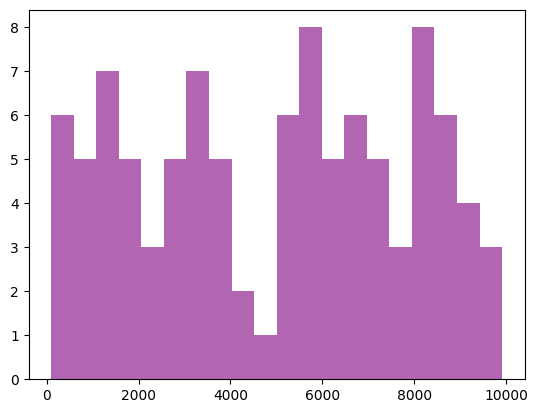

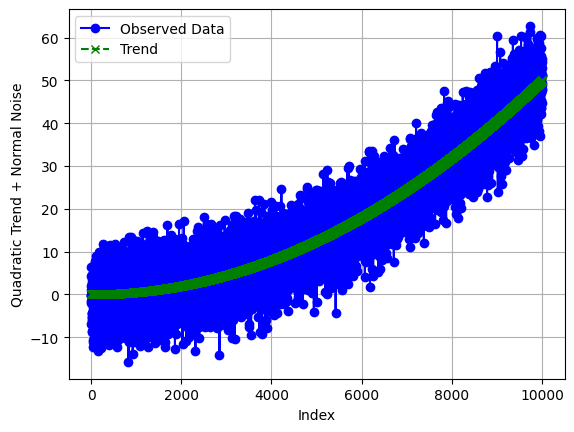

Sample Statistics
Median: -0.03905029758964185
Variance: 25.11737680737222
Standard Deviation: 5.011723935670462


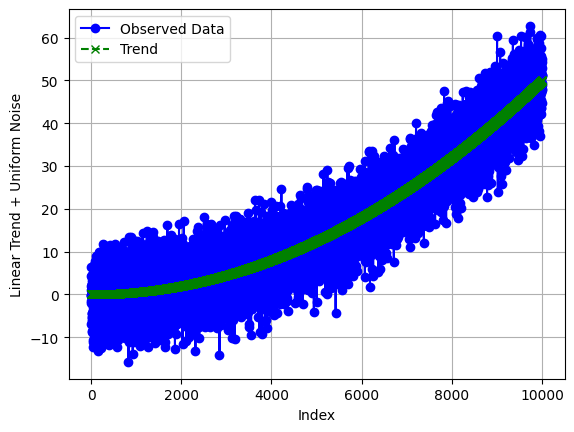

Sample Statistics
Median: -0.03905029758964185
Variance: 25.11737680737222
Standard Deviation: 5.011723935670462


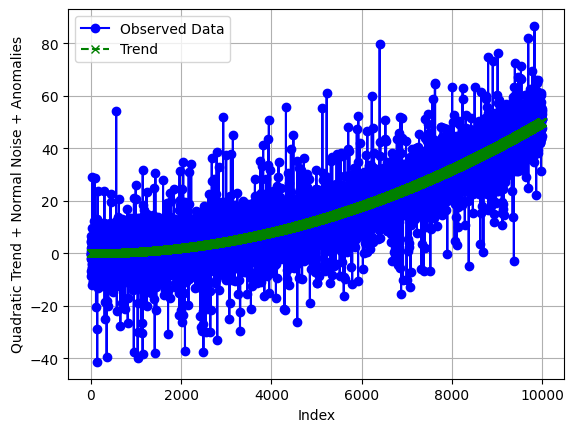

Sample Statistics
Median: -0.014813077206160874
Variance: 48.23329928820725
Standard Deviation: 6.945019747143074


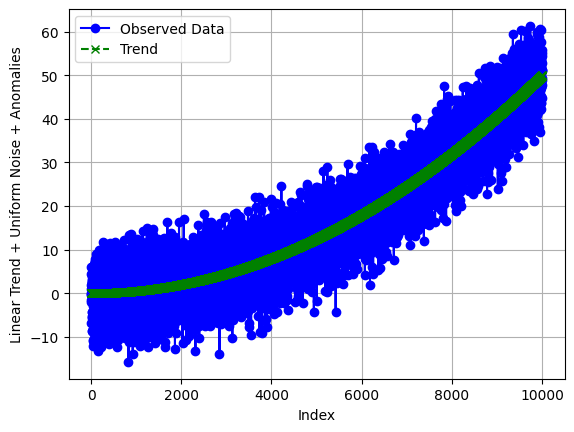

Sample Statistics
Median: 0.21196483871090083
Variance: 24.531819663812403
Standard Deviation: 4.952960696776465
0      28.10
1      28.12
2      28.12
3      28.10
4      28.20
       ...  
343    40.80
344    40.70
345    40.60
346    40.60
347    40.55
Name: Продаж, Length: 348, dtype: float64


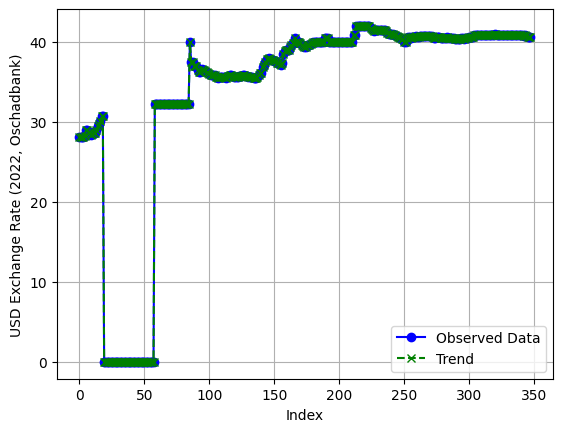

Sample Statistics
Median: 0.2243231691173122
Variance: 63.896746894523595
Standard Deviation: 7.993544075973035


In [16]:
if __name__ == '__main__':
    num_samples = 10000
    iteration = int(num_samples)
    anomaly_factor = 3
    anomaly_percent = 10
    anomaly_count = int((iteration * anomaly_percent) / 100)
    mean_val = 0
    std_dev = 5

    quadratic_trend = quadratic_model(num_samples)
    linear_trend = linear_model(num_samples)

    normal_noise = generate_random_normal(mean_val, std_dev, iteration)
    uniform_noise = generate_random_uniform(100, iteration)

    noisy_quadratic = add_normal_noise(normal_noise, quadratic_trend, num_samples)
    plot_data(quadratic_trend, noisy_quadratic, 'Quadratic Trend + Normal Noise')
    calculate_statistics(noisy_quadratic, 'Normal Noise Sample')

    noisy_linear = noisy_model(normal_noise, linear_trend, num_samples)
    plot_data(linear_trend, noisy_linear, 'Linear Trend + Uniform Noise')
    calculate_statistics(noisy_linear, 'Uniform Noise Sample')

    anomalies_quadratic = add_anomalies_normal(normal_noise, noisy_quadratic, anomaly_count, anomaly_factor)
    plot_data(quadratic_trend, anomalies_quadratic, 'Quadratic Trend + Normal Noise + Anomalies')
    calculate_statistics(anomalies_quadratic, 'Sample with Anomalies')

    anomalies_linear = trend_with_anomalies(linear_trend, noisy_linear, anomaly_count, anomaly_factor)
    plot_data(linear_trend, anomalies_linear, 'Linear Trend + Uniform Noise + Anomalies')
    calculate_statistics(anomalies_linear, 'Sample with Anomalies')

    usd_data = parse_data('https://www.oschadbank.ua/rates-archive', 'Oschadbank (USD).xls', 'Продаж')
    plot_data(usd_data, usd_data, 'USD Exchange Rate (2022, Oschadbank)')
    calculate_statistics(usd_data, 'USD Exchange Rate (2022, Oschadbank)')
